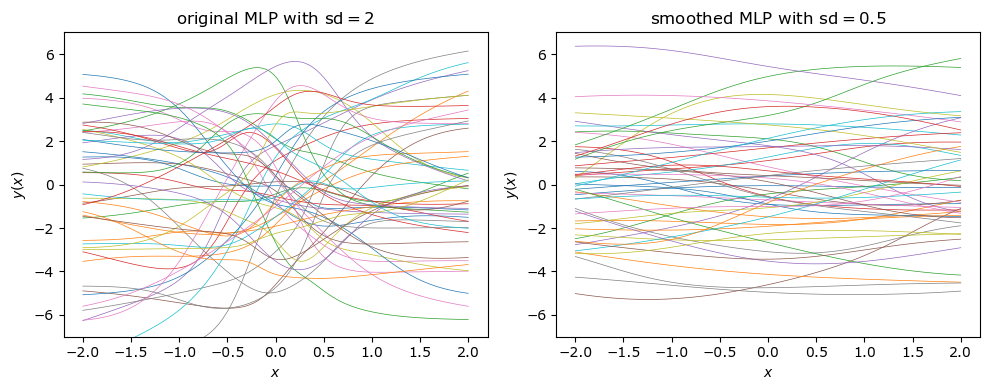

In [1]:
# 3.1: Multilayer Perceptrons (MLP)
# (a), (b), (c)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

N_input = 100
N_hid = 10 # hidden nodes
N_output = 1 # output nodes
n_mlp = 50
x_values = np.linspace(-2, 2, N_input) # shape: (100,)
mlp_outputs = []
mlp_outputs_smooth = []

# define tanh function
def tanh(x):
    return np.tanh(x)

# derivative of tanh
def tanh_prime(x):
    return 1 - np.tanh(x)**2

for i in range(n_mlp):
    w21 = np.random.normal(0, 1, N_hid) # hidden -> output, shape: (10,)
    w10 = np.random.normal(0, 2, N_hid) # input -> hidden, shape: (10,)
    w10_smooth = np.random.normal(0, 0.5, N_hid) # input -> hidden with smaller sd
    bias = np.random.uniform(-2, 2, N_hid) # shape: (10,)

    hidden_layer = tanh(np.outer(x_values, w10) - bias) # shape: (100, 10)
    hidden_layer_smooth = tanh(np.outer(x_values, w10_smooth) - bias)
    
    y = (hidden_layer @ w21) # shape: (100,)
    y_smooth = (hidden_layer_smooth @ w21)
    
    mlp_outputs.append(y)
    mlp_outputs_smooth.append(y_smooth)
    
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(x_values, np.transpose(mlp_outputs), linewidth=0.5)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y(x)$')
ax[0].set_title('original MLP with sd$=$2')
ax[0].set_xlim([-2.2, 2.2])
ax[0].set_ylim([-7, 7])

ax[1].plot(x_values, np.transpose(mlp_outputs_smooth), linewidth=0.5)
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$y(x)$')
ax[1].set_title('smoothed MLP with sd$=$0.5')
ax[1].set_xlim([-2.2, 2.2])
ax[1].set_ylim([-7, 7])

plt.tight_layout()
plt.show()
# We get a smoother plot if we set standard deviation smaller to the input-to-hidden weight

Best MSE original: 0.1666, index: 10
Best MSE smoothed: 0.1303, index: 13


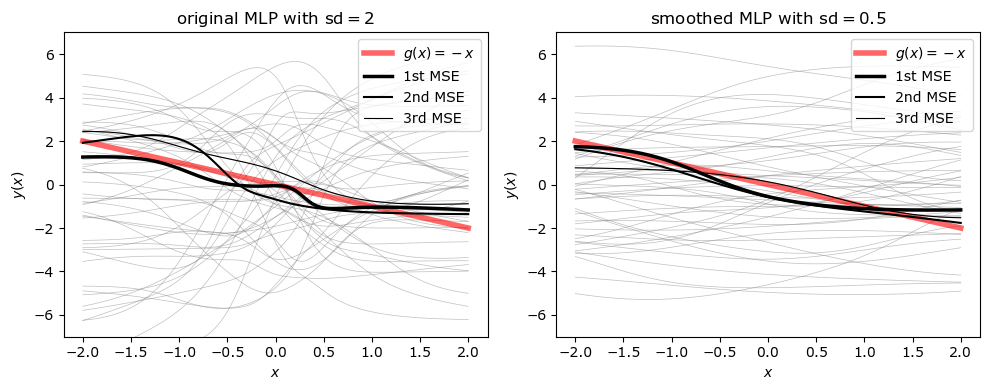

In [2]:
# (d)
mlp_outputs = np.array(mlp_outputs) # shape: (50, 100)
mlp_outputs_smooth = np.array(mlp_outputs_smooth)

def g(x):
    return -x

# mean over x_values, for each MLP
mse_original = np.mean((g(x_values) - mlp_outputs)**2, axis=1)
mse_smooth = np.mean((g(x_values) - mlp_outputs_smooth)**2, axis=1)

# sort MSE from min to max
sorted_original_index = np.argsort(mse_original)
sorted_smooth_index = np.argsort(mse_smooth)
sorted_original = mse_original[sorted_original_index]
sorted_smooth = mse_smooth[sorted_smooth_index]

print(f"Best MSE original: {sorted_original[0]:.4f}, index: {sorted_original_index[0]}")
print(f"Best MSE smoothed: {sorted_smooth[0]:.4f}, index: {sorted_smooth_index[0]}")

# plot y(x) vs. x with g(x) = -x and the prediction with best MSE
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(x_values, np.transpose(mlp_outputs), color='gray', alpha=0.5, linewidth=0.5)
ax[0].plot(x_values, g(x_values), label='$g(x)=-x$', color='red', alpha=0.6, linewidth=4.0)
ax[0].plot(x_values, mlp_outputs[sorted_original_index[0]], label='1st MSE', color='black', linewidth=2.5)
ax[0].plot(x_values, mlp_outputs[sorted_original_index[1]], label='2nd MSE', color='black', linewidth=1.5)
ax[0].plot(x_values, mlp_outputs[sorted_original_index[2]], label='3rd MSE', color='black', linewidth=0.8)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y(x)$')
ax[0].set_title('original MLP with sd$=$2')
ax[0].set_xlim([-2.2, 2.2])
ax[0].set_ylim([-7, 7])
ax[0].legend(loc='upper right')

ax[1].plot(x_values, np.transpose(mlp_outputs_smooth), color='gray', alpha=0.5, linewidth=0.5)
ax[1].plot(x_values, g(x_values), label='$g(x)=-x$', color='red', alpha=0.6, linewidth=4.0)
ax[1].plot(x_values, mlp_outputs_smooth[sorted_smooth_index[0]], label='1st MSE', color='black', linewidth=2.5)
ax[1].plot(x_values, mlp_outputs_smooth[sorted_smooth_index[1]], label='2nd MSE', color='black', linewidth=1.5)
ax[1].plot(x_values, mlp_outputs_smooth[sorted_smooth_index[2]], label='3rd MSE', color='black', linewidth=0.8)
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$y(x)$')
ax[1].set_title('smoothed MLP with sd$=$0.5')
ax[1].set_xlim([-2.2, 2.2])
ax[1].set_ylim([-7, 7])
ax[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

# (smoothed) MLP with a smaller standard deviation approximates the function g better than the one with a larger sd